# About

## About the Dataset

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from lib.utils import *
from pandas_summary import DataFrameSummary
from sklearn import metrics as met

In [3]:
np.random.seed(42)
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 20
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('input/raw/data.csv') # Reading the Dataset

# Exploratory Data Analysis (EDA)

## Stage 1

In [5]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.rename(columns={'classification' : 'class'}, inplace=True)

In [9]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

### Finding and Removing Anomalies

In [10]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [11]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [12]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [13]:
for i in ['pcv','wc','rc']:
    df[i] = df[i].str.extract('(\d+\.\d+|\d+)').astype(float)

In [14]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [15]:
df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)

In [16]:
df['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [17]:
df['cad'].replace(to_replace={'\tno':'no'}, inplace=True)

In [18]:
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [19]:
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

#### Checking whether the anomalies have been removed

In [20]:
df['pcv'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [21]:
df['wc'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [22]:
df['rc'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1,
       5.8, 5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [23]:
df['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [24]:
df['cad'].unique()

array(['no', 'yes', nan], dtype=object)

In [25]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

### Graphical Exploration

In [26]:
sns.set(context='notebook', style=None, palette='muted')

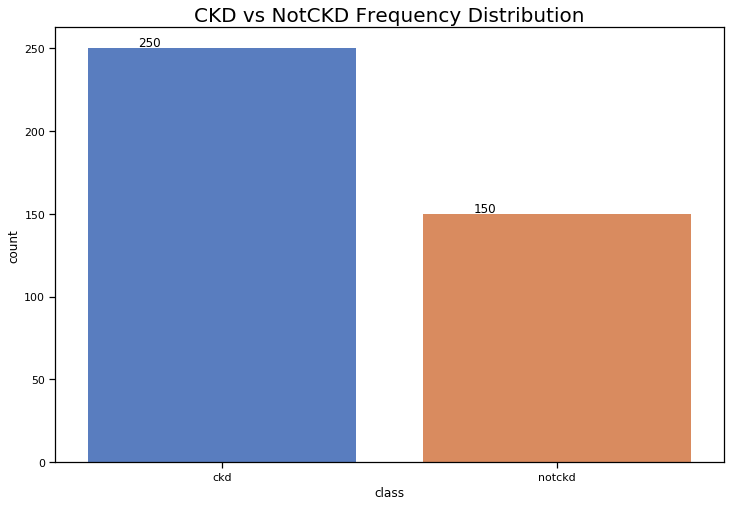

In [27]:
ax = sns.countplot(data = df, x ='class')
ax.set_title('CKD vs NotCKD Frequency Distribution', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

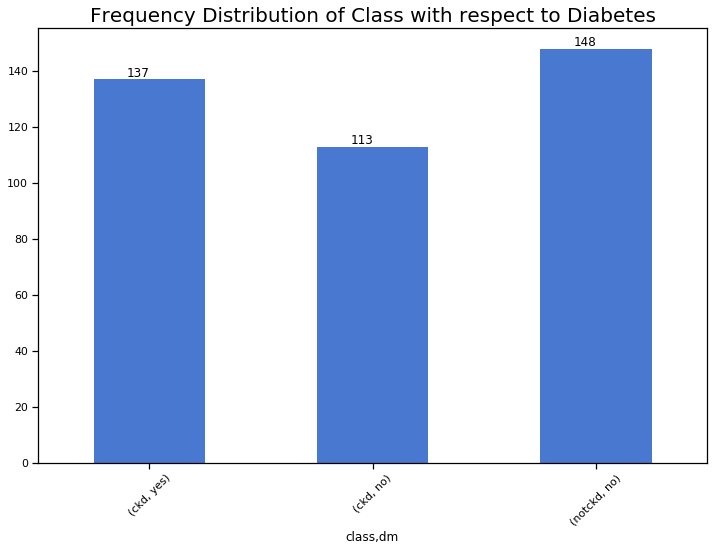

In [28]:
ax = df['dm'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Diabetes', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

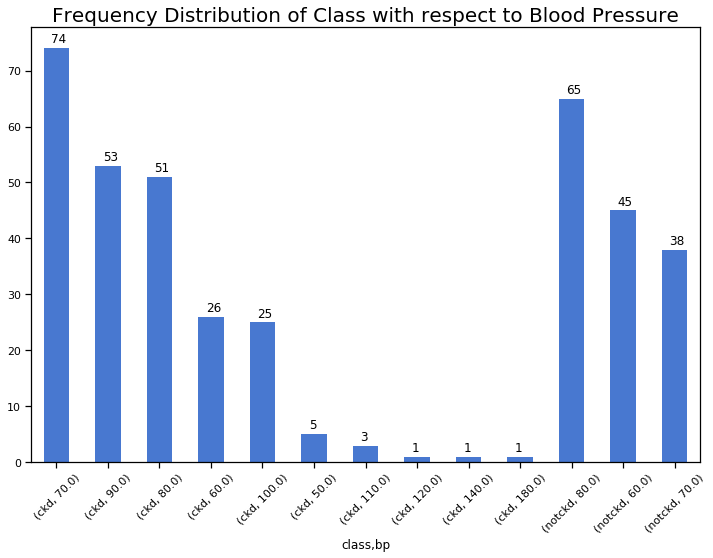

In [29]:
ax = df['bp'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Blood Pressure', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

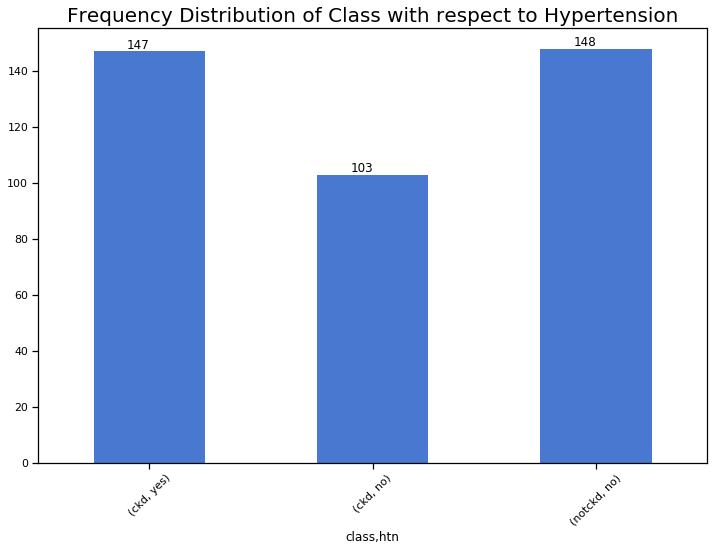

In [30]:
ax = df['htn'].groupby(df['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Hypertension', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

### Saving Stage 1

In [31]:
df.drop('id', axis=1, inplace=True)

In [32]:
import os
os.makedirs('./input/processed/', exist_ok=True)
df.to_feather('./input/processed/ckd-raw')

## Stage 2

In [33]:
import feather 
df = feather.read_dataframe('input/processed/ckd-raw')

In [34]:
for i in ['sg', 'al', 'su']:
    df[i] = df[i].astype('category')

In [35]:
train_cats(df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null category
al       354 non-null category
su       351 non-null category
rbc      248 non-null category
pc       335 non-null category
pcc      396 non-null category
ba       396 non-null category
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wc       294 non-null float64
rc       269 non-null float64
htn      398 non-null category
dm       398 non-null category
cad      398 non-null category
appet    399 non-null category
pe       399 non-null category
ane      399 non-null category
class    400 non-null category
dtypes: category(14), float64(11)
memory usage: 41.6 KB


In [37]:
df['class'].cat.categories

Index(['ckd', 'notckd'], dtype='object')

In [38]:
for i in df.columns:
    if df[i].dtype.name == 'category':
        print(i, dict(enumerate(df[i].cat.categories)) )

sg {0: 1.005, 1: 1.01, 2: 1.015, 3: 1.02, 4: 1.025}
al {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
su {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
rbc {0: 'abnormal', 1: 'normal'}
pc {0: 'abnormal', 1: 'normal'}
pcc {0: 'notpresent', 1: 'present'}
ba {0: 'notpresent', 1: 'present'}
htn {0: 'no', 1: 'yes'}
dm {0: 'no', 1: 'yes'}
cad {0: 'no', 1: 'yes'}
appet {0: 'good', 1: 'poor'}
pe {0: 'no', 1: 'yes'}
ane {0: 'no', 1: 'yes'}
class {0: 'ckd', 1: 'notckd'}


In [39]:
df['appet'].cat.codes

0      0
1      0
2      1
3      1
4      0
5      0
6      0
7      0
8      0
9      1
10     0
11     1
12     1
13     1
14     1
15     0
16     0
17     1
18     0
19     0
20     1
21     0
22     0
23     1
24     1
25     0
26     1
27     0
28     0
29     0
30     0
31     1
32     1
33     1
34     1
35     1
36     0
37     1
38     0
39     0
40     0
41     0
42     0
43     0
44     1
45     1
46     0
47     0
48     0
49     1
50     1
51     1
52     1
53     0
54     0
55     0
56     1
57     1
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     1
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     1
83     0
84     1
85     1
86     0
87     1
88     0
89     1
90     0
91     0
92     0
93     1
94     0
95     0
96     1
97     1
98     1
99     1
100    0
101    0
102    0
103    1
104    1
105    0
106    0
107    0
108    0
109    0
110    0
1

In [40]:
df['appet'].cat.set_categories(['poor', 'good'], ordered=True, inplace=True)
df['appet'].cat.codes

0      1
1      1
2      0
3      0
4      1
5      1
6      1
7      1
8      1
9      0
10     1
11     0
12     0
13     0
14     0
15     1
16     1
17     0
18     1
19     1
20     0
21     1
22     1
23     0
24     0
25     1
26     0
27     1
28     1
29     1
30     1
31     0
32     0
33     0
34     0
35     0
36     1
37     0
38     1
39     1
40     1
41     1
42     1
43     1
44     0
45     0
46     1
47     1
48     1
49     0
50     0
51     0
52     0
53     1
54     1
55     1
56     0
57     0
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     0
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     0
80     1
81     1
82     0
83     1
84     0
85     0
86     1
87     0
88     1
89     0
90     1
91     1
92     1
93     0
94     1
95     1
96     0
97     0
98     0
99     0
100    1
101    1
102    1
103    0
104    0
105    1
106    1
107    1
108    1
109    1
110    1
1

In [41]:
df['class'].cat.codes

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [42]:
df['class'].cat.set_categories(['notckd', 'ckd'], ordered=True, inplace=True)
df['class'].cat.codes

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [43]:
for i in df.columns:
    if df[i].dtype.name == 'category':
        print(i, dict(enumerate(df[i].cat.categories)) )

sg {0: 1.005, 1: 1.01, 2: 1.015, 3: 1.02, 4: 1.025}
al {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
su {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
rbc {0: 'abnormal', 1: 'normal'}
pc {0: 'abnormal', 1: 'normal'}
pcc {0: 'notpresent', 1: 'present'}
ba {0: 'notpresent', 1: 'present'}
htn {0: 'no', 1: 'yes'}
dm {0: 'no', 1: 'yes'}
cad {0: 'no', 1: 'yes'}
appet {0: 'poor', 1: 'good'}
pe {0: 'no', 1: 'yes'}
ane {0: 'no', 1: 'yes'}
class {0: 'notckd', 1: 'ckd'}


In [44]:
df.to_feather('./input/processed/ckd-cat-mod')

## EDA Done

In [45]:
import feather 
df = feather.read_dataframe('input/processed/ckd-cat-mod')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null category
al       354 non-null category
su       351 non-null category
rbc      248 non-null category
pc       335 non-null category
pcc      396 non-null category
ba       396 non-null category
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wc       294 non-null float64
rc       269 non-null float64
htn      398 non-null category
dm       398 non-null category
cad      398 non-null category
appet    399 non-null category
pe       399 non-null category
ane      399 non-null category
class    400 non-null category
dtypes: category(14), float64(11)
memory usage: 41.6 KB


In [47]:
for i in df.columns:
    if df[i].dtype.name == 'category':
        print(i, dict(enumerate(df[i].cat.categories)) )

sg {0: 1.005, 1: 1.01, 2: 1.015, 3: 1.02, 4: 1.025}
al {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
su {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
rbc {0: 'abnormal', 1: 'normal'}
pc {0: 'abnormal', 1: 'normal'}
pcc {0: 'notpresent', 1: 'present'}
ba {0: 'notpresent', 1: 'present'}
htn {0: 'no', 1: 'yes'}
dm {0: 'no', 1: 'yes'}
cad {0: 'no', 1: 'yes'}
appet {0: 'poor', 1: 'good'}
pe {0: 'no', 1: 'yes'}
ane {0: 'no', 1: 'yes'}
class {0: 'notckd', 1: 'ckd'}


# Creating Feature Variable, Target Variable and Handling Missing Data

In [48]:
x, y, nas = proc_df(df, 'class')

In [49]:
x.shape, y.shape

((400, 35), (400,))

In [50]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
0,48.0,80.0,4,2,1,0,2,1,1,121.0,36.0,1.20,138.0,4.4,15.40,44.0,7800.0,5.2,2,2,1,2,1,1,False,False,False,False,False,True,True,False,False,False,False
1,7.0,50.0,4,5,1,0,2,1,1,121.0,18.0,0.80,138.0,4.4,11.30,38.0,6000.0,4.8,1,1,1,2,1,1,False,False,True,False,False,True,True,False,False,False,True
2,62.0,80.0,2,3,4,2,2,1,1,423.0,53.0,1.80,138.0,4.4,9.60,31.0,7500.0,4.8,1,2,1,1,1,2,False,False,False,False,False,True,True,False,False,False,True
3,48.0,70.0,1,5,1,2,1,2,1,117.0,56.0,3.80,111.0,2.5,11.20,32.0,6700.0,3.9,2,1,1,1,2,2,False,False,False,False,False,False,False,False,False,False,False
4,51.0,80.0,2,3,1,2,2,1,1,106.0,26.0,1.40,138.0,4.4,11.60,35.0,7300.0,4.6,1,1,1,2,1,1,False,False,False,False,False,True,True,False,False,False,False
5,60.0,90.0,3,4,1,0,0,1,1,74.0,25.0,1.10,142.0,3.2,12.20,39.0,7800.0,4.4,2,2,1,2,2,1,False,False,False,False,False,False,False,False,False,False,False
6,68.0,70.0,2,1,1,0,2,1,1,100.0,54.0,24.00,104.0,4.0,12.40,36.0,8000.0,4.8,1,1,1,2,1,1,False,False,False,False,False,False,False,False,False,True,True
7,24.0,80.0,3,3,5,2,1,1,1,410.0,31.0,1.10,138.0,4.4,12.40,44.0,6900.0,5.0,1,2,1,2,2,1,False,True,False,False,False,True,True,False,False,False,False
8,52.0,100.0,3,4,1,2,1,2,1,138.0,60.0,1.90,138.0,4.4,10.80,33.0,9600.0,4.0,2,2,1,2,1,2,False,False,False,False,False,True,True,False,False,False,False
9,53.0,90.0,4,3,1,1,1,2,1,70.0,107.0,7.20,114.0,3.7,9.50,29.0,12100.0,3.7,2,2,1,1,1,2,False,False,False,False,False,False,False,False,False,False,False


In [51]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 35 columns):
age        400 non-null float64
bp         400 non-null float64
sg         400 non-null int8
al         400 non-null int8
su         400 non-null int8
rbc        400 non-null int8
pc         400 non-null int8
pcc        400 non-null int8
ba         400 non-null int8
bgr        400 non-null float64
bu         400 non-null float64
sc         400 non-null float64
sod        400 non-null float64
pot        400 non-null float64
hemo       400 non-null float64
pcv        400 non-null float64
wc         400 non-null float64
rc         400 non-null float64
htn        400 non-null int8
dm         400 non-null int8
cad        400 non-null int8
appet      400 non-null int8
pe         400 non-null int8
ane        400 non-null int8
age_na     400 non-null bool
bp_na      400 non-null bool
bgr_na     400 non-null bool
bu_na      400 non-null bool
sc_na      400 non-null bool
sod_na     400 non-nu

In [53]:
nas

{'age': 55.0,
 'bp': 80.0,
 'bgr': 121.0,
 'bu': 42.0,
 'sc': 1.3,
 'sod': 138.0,
 'pot': 4.4,
 'hemo': 12.649999999999999,
 'pcv': 40.0,
 'wc': 8000.0,
 'rc': 4.8}

In [54]:
cols = x.columns
cols

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'age_na', 'bp_na', 'bgr_na', 'bu_na', 'sc_na',
       'sod_na', 'pot_na', 'hemo_na', 'pcv_na', 'wc_na', 'rc_na'],
      dtype='object')

# Feature Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
x_tmp = scaler.fit_transform(x)

In [57]:
x_scaled = pd.DataFrame(x_tmp, columns=cols)
x_scaled.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
0,0.522727,0.230769,0.8,0.333333,0.166667,0.0,1.0,0.5,0.5,0.211538,0.088575,0.010582,0.842271,0.042697,0.836735,0.777778,0.231405,0.525424,1.0,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.8,0.833333,0.166667,0.0,1.0,0.5,0.5,0.211538,0.042362,0.005291,0.842271,0.042697,0.557823,0.644444,0.157025,0.457627,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.681818,0.230769,0.4,0.500000,0.666667,1.0,1.0,0.5,0.5,0.856838,0.132221,0.018519,0.842271,0.042697,0.442177,0.488889,0.219008,0.457627,0.5,1.0,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.522727,0.153846,0.2,0.833333,0.166667,1.0,0.5,1.0,0.5,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,0.5,0.5,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.556818,0.230769,0.4,0.500000,0.166667,1.0,1.0,0.5,0.5,0.179487,0.062901,0.013228,0.842271,0.042697,0.578231,0.577778,0.210744,0.423729,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# Creating Training set and Test set

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, stratify=y, random_state=42)

In [59]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((300, 35), (300,), (100, 35), (100,))

In [60]:
x_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
67,0.488636,0.230769,0.8,0.666667,0.166667,1.0,0.5,0.5,0.5,0.861111,0.103979,0.011905,0.842271,0.042697,0.649660,0.688889,0.239669,0.457627,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
180,0.806818,0.307692,0.4,0.333333,0.833333,0.5,0.5,1.0,0.5,0.452991,0.139923,0.019841,0.842271,0.042697,0.489796,0.422222,0.239669,0.457627,0.5,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
234,0.397727,0.384615,0.4,0.166667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.044929,0.011905,0.842271,0.042697,0.809524,0.777778,0.078512,0.525424,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
243,0.681818,0.307692,0.8,0.500000,0.333333,0.0,1.0,0.5,0.5,0.314103,0.119384,0.026455,0.842271,0.008989,0.700680,0.844444,0.363636,0.677966,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.659091,0.076923,0.4,0.666667,0.333333,1.0,0.5,1.0,0.5,0.568376,0.088575,0.017196,0.791798,0.011236,0.326531,0.355556,0.537190,0.152542,1.0,0.5,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
x_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
70,0.670455,0.230769,0.6,0.166667,0.833333,0.0,1.0,0.5,0.5,0.722222,0.044929,0.003968,0.835962,0.042697,0.823129,0.777778,0.252066,0.525424,1.0,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.761364,0.230769,0.8,0.666667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.260591,0.048942,0.804416,0.076404,0.639456,0.688889,0.239669,0.457627,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
27,0.761364,0.153846,0.4,0.666667,0.833333,1.0,0.5,0.5,0.5,0.517094,0.219512,0.030423,0.791798,0.033708,0.639456,0.622222,0.305785,0.338983,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395,0.602273,0.230769,0.8,0.166667,0.166667,1.0,1.0,0.5,0.5,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.844444,0.185950,0.474576,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.772727,0.153846,0.6,0.500000,0.000000,0.0,0.0,0.5,0.5,0.211538,0.114249,0.014550,0.842271,0.042697,0.462585,0.688889,0.239669,0.457627,0.5,1.0,0.5,0.5,1.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [62]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], d

In [63]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int8)

In [64]:
x_train.drop(x_train.iloc[:,24:], axis=1, inplace=True)
x_test.drop(x_test.iloc[:,24:], axis=1, inplace=True)

In [65]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((300, 24), (300,), (100, 24), (100,))

In [66]:
x_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
67,0.488636,0.230769,0.8,0.666667,0.166667,1.0,0.5,0.5,0.5,0.861111,0.103979,0.011905,0.842271,0.042697,0.649660,0.688889,0.239669,0.457627,0.5,0.5,0.5,0.5,0.5,0.5
180,0.806818,0.307692,0.4,0.333333,0.833333,0.5,0.5,1.0,0.5,0.452991,0.139923,0.019841,0.842271,0.042697,0.489796,0.422222,0.239669,0.457627,0.5,1.0,0.5,1.0,0.5,0.5
234,0.397727,0.384615,0.4,0.166667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.044929,0.011905,0.842271,0.042697,0.809524,0.777778,0.078512,0.525424,1.0,0.5,0.5,1.0,0.5,0.5
243,0.681818,0.307692,0.8,0.500000,0.333333,0.0,1.0,0.5,0.5,0.314103,0.119384,0.026455,0.842271,0.008989,0.700680,0.844444,0.363636,0.677966,1.0,0.5,0.5,1.0,0.5,0.5
147,0.659091,0.076923,0.4,0.666667,0.333333,1.0,0.5,1.0,0.5,0.568376,0.088575,0.017196,0.791798,0.011236,0.326531,0.355556,0.537190,0.152542,1.0,0.5,0.5,0.5,0.5,1.0


In [67]:
x_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
70,0.670455,0.230769,0.6,0.166667,0.833333,0.0,1.0,0.5,0.5,0.722222,0.044929,0.003968,0.835962,0.042697,0.823129,0.777778,0.252066,0.525424,1.0,1.0,0.5,1.0,0.5,0.5
38,0.761364,0.230769,0.8,0.666667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.260591,0.048942,0.804416,0.076404,0.639456,0.688889,0.239669,0.457627,1.0,0.5,0.5,1.0,0.5,0.5
27,0.761364,0.153846,0.4,0.666667,0.833333,1.0,0.5,0.5,0.5,0.517094,0.219512,0.030423,0.791798,0.033708,0.639456,0.622222,0.305785,0.338983,1.0,1.0,1.0,1.0,1.0,0.5
395,0.602273,0.230769,0.8,0.166667,0.166667,1.0,1.0,0.5,0.5,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.844444,0.185950,0.474576,0.5,0.5,0.5,1.0,0.5,0.5
85,0.772727,0.153846,0.6,0.500000,0.000000,0.0,0.0,0.5,0.5,0.211538,0.114249,0.014550,0.842271,0.042697,0.462585,0.688889,0.239669,0.457627,0.5,1.0,0.5,0.5,1.0,0.5


# Model(s) Building / Training and Testing (With Cross Validation)

In [68]:
scores = []
models = []

In [122]:
#Utility function for plotting confusion matrix

def plot_cm(y_true, y_pred):
    cm = met.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()

In [123]:
from sklearn.model_selection import cross_val_score

# utility function to print cross k-fold cross validation scores, their mean and variance(standard deviation)
def print_scores(model, x_train, y_train, cv, scoring):
    print('Cross validation scores:', cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) )
    print( 'Mean of scores:', np.mean( cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    print( 'Variance:', np.std( cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    

## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, n_jobs=-1)

In [125]:
print_scores(lr, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.98360656 0.95081967 0.96666667 0.96610169 1.        ]
Mean of scores: 0.9734389182180235
Variance: 0.01685348914560547


In [126]:
lr.fit(x_train.values, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=42, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
lr_preds = lr.predict(x_test.values)

In [128]:
lr_score = met.accuracy_score(y_test, lr_preds) * 100
scores.append(lr_score)
models.append('Logistic Regression')

Logistic Regression Accuracy =  100.0


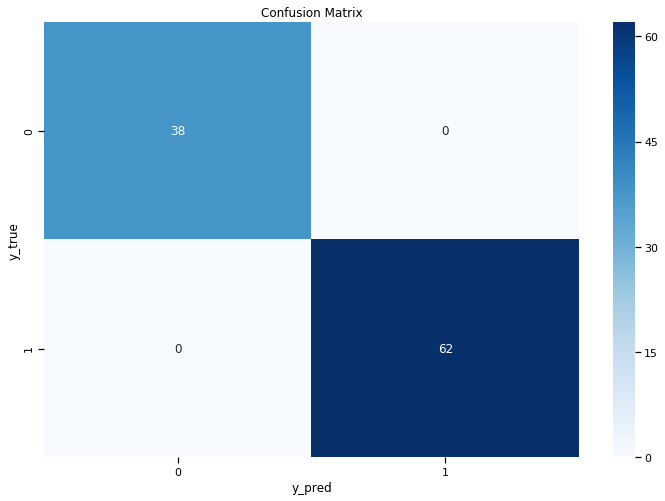

In [129]:
print('Logistic Regression Accuracy = ', lr_score)
plot_cm(y_test, lr_preds)

## Support Vector Classifier

In [130]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [131]:
print_scores(svc, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.98360656 0.93442623 0.95       0.96610169 0.98305085]
Mean of scores: 0.9634370658516256
Variance: 0.01908293703482212


In [132]:
svc.fit(x_train.values, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [133]:
svc_preds = svc.predict(x_test.values)

In [134]:
svc_score = met.accuracy_score(y_test, svc_preds) * 100
scores.append(svc_score)
models.append('Support Vector Classifier')

Support Vector Classifier Accuracy =  96.0


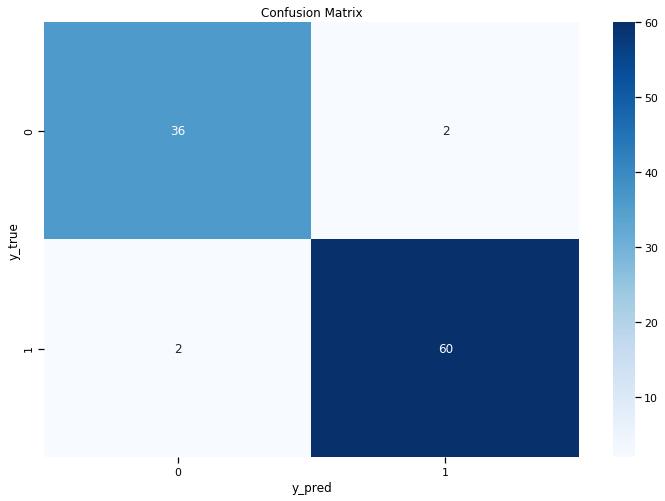

In [135]:
print('Support Vector Classifier Accuracy = ', svc_score)
plot_cm(y_test, svc_preds)

## K-Nearest Neighbors Classifier

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [137]:
print_scores(knn, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.96721311 0.98360656 0.95       1.         1.        ]
Mean of scores: 0.9801639344262295
Variance: 0.019372027864554046


In [138]:
knn.fit(x_train.values, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [139]:
knn_preds = knn.predict(x_test.values)

In [140]:
knn_score = met.accuracy_score(y_test, knn_preds) * 100
scores.append(knn_score)
models.append('K-Nearest Neighbors Classifier')

K-Nearest Neighbors Classifier Accuracy =  98.0


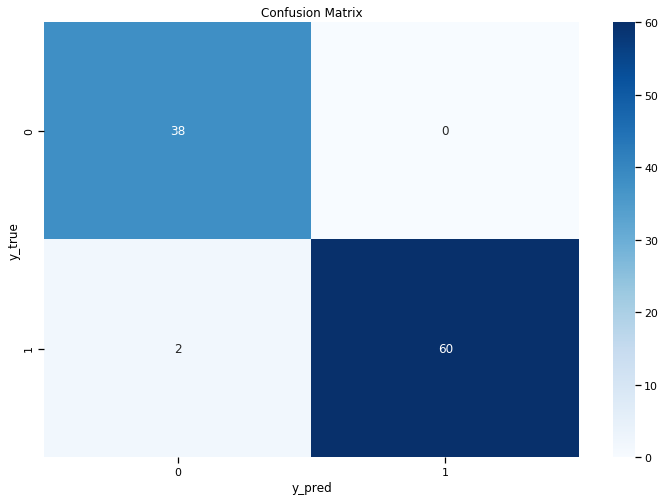

In [141]:
print('K-Nearest Neighbors Classifier Accuracy = ', knn_score)
plot_cm(y_test, knn_preds)

## Naive Bayes Classifier

In [142]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [143]:
print_scores(gnb, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.96721311 0.91803279 0.88333333 0.93220339 0.91525424]
Mean of scores: 0.9232073724182644
Variance: 0.027193386602600383


In [144]:
gnb.fit(x_train.values, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [145]:
gnb_preds = gnb.predict(x_test.values)

In [146]:
gnb_score = met.accuracy_score(y_test, gnb_preds) * 100
scores.append(gnb_score)
models.append('Naive Bayes Classifier')

Naive Bayes Classifier Accuracy =  97.0


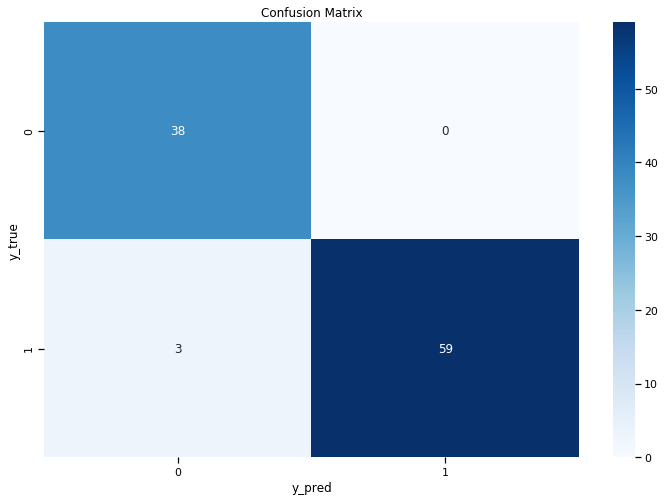

In [147]:
print('Naive Bayes Classifier Accuracy = ', gnb_score)
plot_cm(y_test, gnb_preds)

## SGD Classifier

In [148]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=42)

In [149]:
print_scores(sgd, x_train, y_train, 5, 'accuracy')

Cross validation scores: [1.         1.         0.98333333 1.         1.        ]
Mean of scores: 0.9966666666666667
Variance: 0.006666666666666687


In [150]:
sgd.fit(x_train.values, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [151]:
sgd_preds = sgd.predict(x_test.values)

In [152]:
sgd_score = met.accuracy_score(y_test, sgd_preds) * 100
scores.append(sgd_score)
models.append('SGD Classifier')

SGD Classifier Accuracy =  100.0


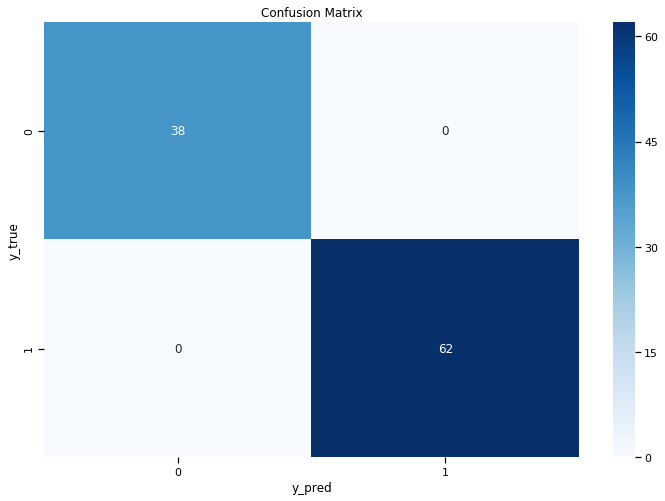

In [153]:
print('SGD Classifier Accuracy = ', sgd_score)
plot_cm(y_test, sgd_preds)

## Decision Tree Classifier

In [154]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [155]:
print_scores(dt, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.96721311 0.93442623 1.         1.         0.93220339]
Mean of scores: 0.9667685468185606
Variance: 0.029831634780422805


In [156]:
dt.fit(x_train.values, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [157]:
dt_preds = dt.predict(x_test.values)

In [158]:
dt_score = met.accuracy_score(y_test, dt_preds) * 100
scores.append(dt_score)
models.append('Decision Tree Classifier')

Decision Tree Classifier Accuracy =  97.0


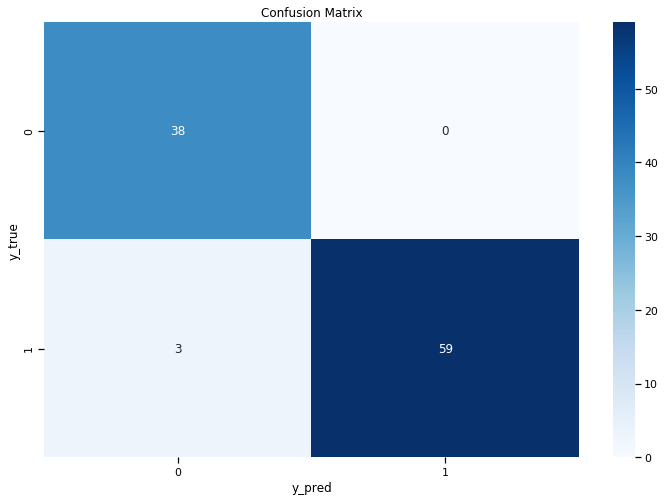

In [159]:
print('Decision Tree Classifier Accuracy = ', dt_score)
plot_cm(y_test, dt_preds)

## Random Forest Classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [161]:
print_scores(rf, x_train, y_train, 5, 'accuracy')

Cross validation scores: [1.         0.98360656 1.         1.         1.        ]
Mean of scores: 0.9967213114754099
Variance: 0.006557377049180336


In [162]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [163]:
rf_preds = rf.predict(x_test)

In [164]:
rf_score = met.accuracy_score(y_test, rf_preds) * 100
scores.append(rf_score)
models.append('Random Forest Classifier')

Random Forest Classifier Accuracy =  100.0


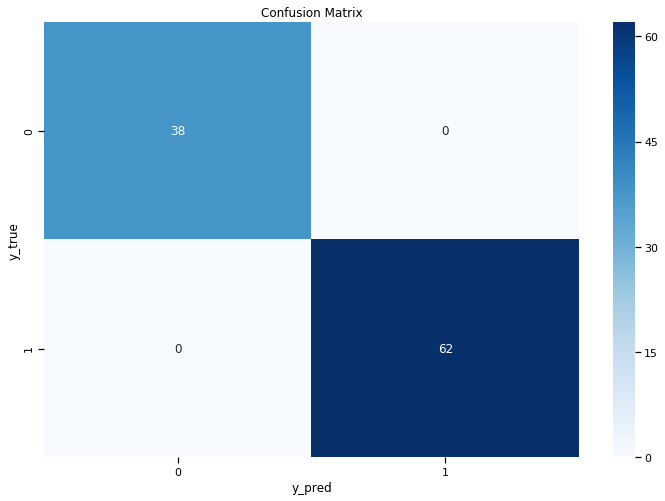

In [165]:
print('Random Forest Classifier Accuracy = ', rf_score)
plot_cm(y_test, rf_preds)

# Accuracy Comparison of Models

In [166]:
models

['Logistic Regression',
 'Support Vector Classifier',
 'K-Nearest Neighbors Classifier',
 'Naive Bayes Classifier',
 'SGD Classifier',
 'Decision Tree Classifier',
 'Random Forest Classifier',
 'Logistic Regression',
 'Support Vector Classifier',
 'K-Nearest Neighbors Classifier',
 'Naive Bayes Classifier',
 'SGD Classifier',
 'Decision Tree Classifier',
 'Random Forest Classifier']

In [167]:
scores

[100.0,
 96.0,
 98.0,
 97.0,
 100.0,
 97.0,
 100.0,
 100.0,
 96.0,
 98.0,
 97.0,
 100.0,
 97.0,
 100.0]

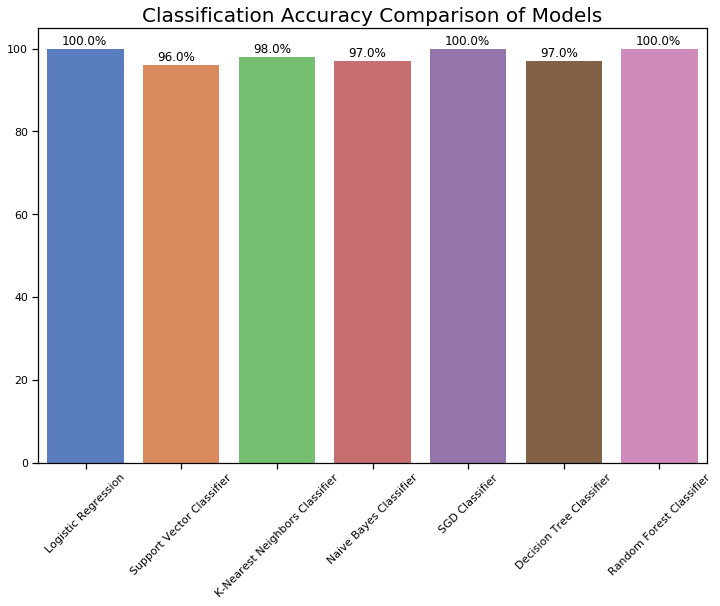

In [168]:
ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

# Saving a Model for Deployment

In [169]:
from sklearn.externals import joblib

In [170]:
joblib.dump(rf, './models/rf-ckd.pkl')

['./models/rf-ckd.pkl']

In [171]:
# Loading the saved model for prediction

In [172]:
rf_load = joblib.load('./models/rf-ckd.pkl')

In [173]:
p = rf_load.predict(x_test)

In [174]:
p == rf_preds

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])